# Import Libraries

In [13]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

### Mount Google Drive

In [14]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
BASE_PATH = "/content/drive/My Drive/medium/birthday_paradox" 
os.chdir(BASE_PATH)

# prob_of_same_birthday

In [4]:
def prob_of_same_birthday(groupSize):

  # No of trials (no of groups)
  trials = 10000               

  # count is number of groups in that at least two people are sharing same 
  # birthday
  count = 0                    

  for trial in range(0,trials):

    # This list has 366 zeros as we haven't assign birthdate to any one yet.
    days = [0]*366  

    for _ in range(1, groupSize+1): 
      
      # This is the birthday of a chosen person (randomly assigned)
      birthDay = random.randint(1,365)                 

      # days[birthDay] is 1, if someone has already birthday on that day
      if(days[birthDay]):                              
        count += 1      # increase count

        # Because now we know that there is at least a pair of person that 
        # shares same birthday.So, no need to check further
        break                                          
      else:
        # days[birthDay] is assign 1 beacuse chosen person has birthDay on this
        # day
        days[birthDay] = 1                             

  return (count/trials)*100  # probability

# Find probability for group size of 1 to 365

In [5]:
# list of group sizes from 1 to 365. For group Size > 365, prob. is always 100%
X = [groupSize for groupSize in range(1,366)]
# list will assigned a probability           
Y = []   

for groupSize in X:
  Y.append(prob_of_same_birthday(groupSize))

# Visulization

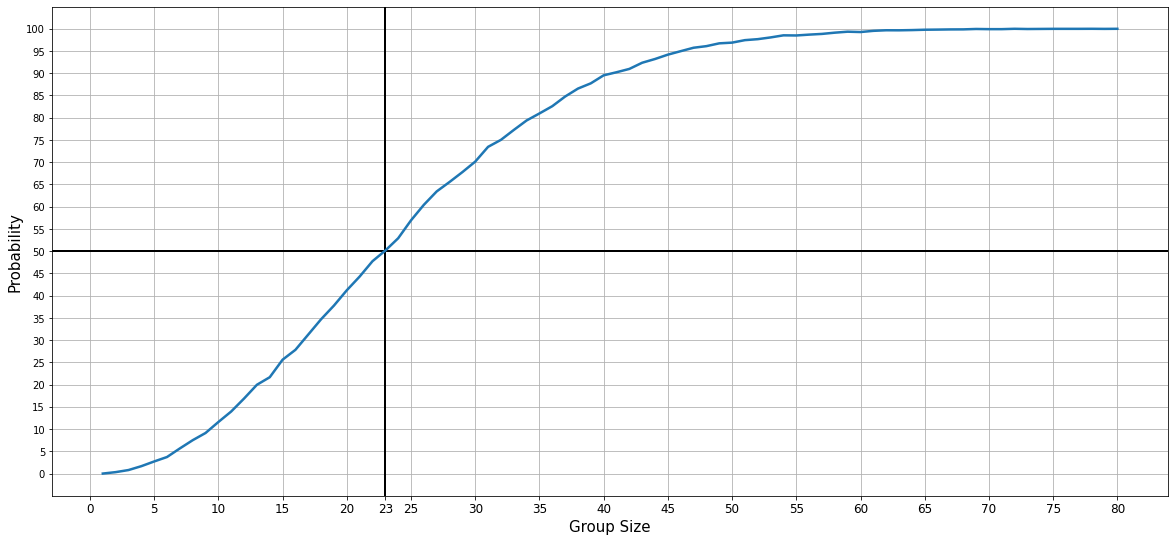

In [16]:
# Find at least how many people need in a group to have probability greater than 50%
count = None
for groupSize in X:
  if(Y[groupSize-1]>=50):
    count = groupSize
    break

# Plotting a Graph for visulization
figure(figsize=(20,9))
x_axis = [groupSize for groupSize in range(0,81,5)]
x_axis.append(count)
plt.xticks(x_axis,fontsize = 12)
plt.axvline(count,linewidth=2,color="black")
plt.axhline(50,linewidth=2,color="black")
plt.yticks([p for p in range(0,101,5)])
plt.plot(X[:80],Y[:80],linewidth = 2.5)
plt.xlabel("Group Size",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)
plt.grid()
plt.savefig("main_graph.jpg")

# Find change in probability with each iteration for groupsize 23

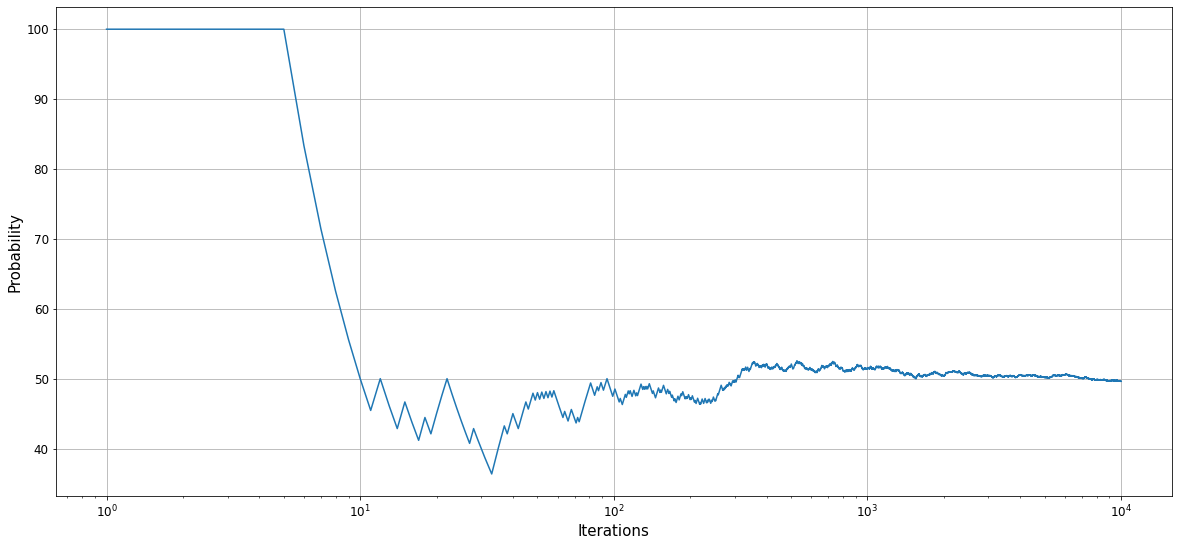

In [20]:
# List will store probability with each iteration
prob = []                 
# Other part is as same as explained above
trials = 10000
count = 0
groupSize = 23
for trial in range(0,trials):

  Days = [0]*366
  for _ in range(1,groupSize+1):
    
    birthDay = random.randint(1,365)

    if Days[birthDay]:
      count += 1
      break
    else:
      Days[birthDay] = 1
  prob.append((count/(trial+1))*100)


figure(figsize=(20,9))
X = [iteration for iteration in range(1,len(prob)+1)] # number of iterations

# Plotting Graph
plt.xscale("log") # X axis has logarithmic scale 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.plot(X,prob)
plt.grid()
plt.xlabel("Iterations",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)
plt.savefig("iterations_log.jpg")

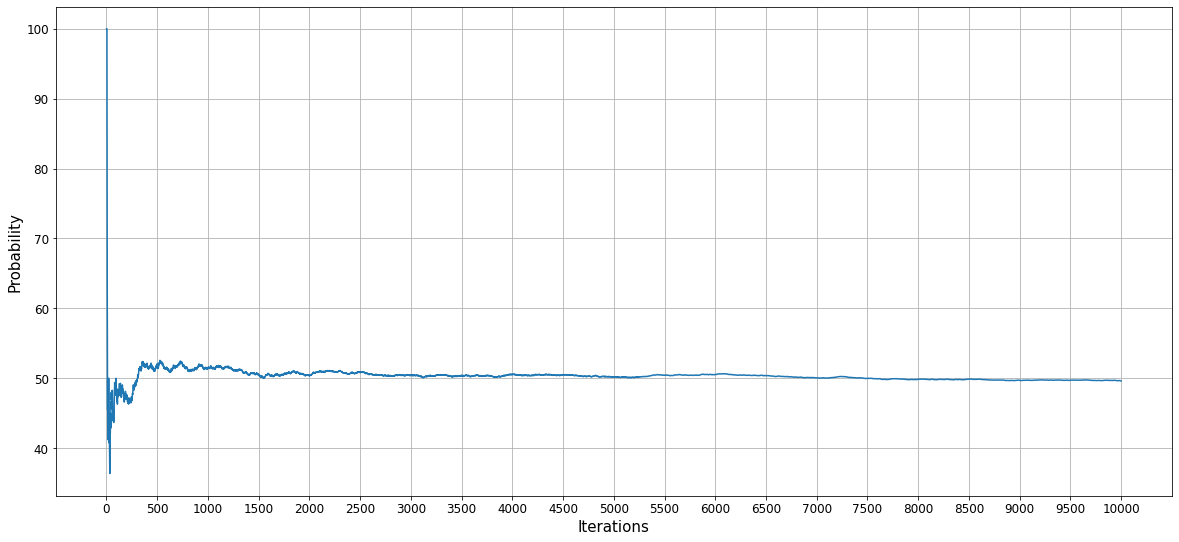

In [21]:
# Same Graph as above, but without logarithmic scale
figure(figsize=(20,9))
plt.plot(X,prob)
plt.xticks([i for i in range(0,len(prob)+1,500)])
plt.grid()
plt.xlabel("Iterations",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("itterations.jpg")

# Visulization with Mathematical Formula

### In above portion, we have done analysis and visulization based on simulation. But now we have a mathematical formula for find probability for given number of group. Based on this, now we will do analysis and visulization

In [32]:
# X list consists group size from 1 to 365.
X = [a for a in range(1,365)]
# Y list will consist probability for each size of group, derived from formula
Y  = []

# Formula:- 
# P(at least two people has same birthday in a group) = 1 - (Permutation(365,N)/365^N)
# N is number of people in a group

# Find at least how many person must be in a group to get prob. > 50
count = None 

for x in X:
  ans = 1
  for i in range(1,x+1):
    ans *= (366-i)/365 
  Y.append((1-ans)*100)
  if((1-ans)*100 > 50 and count is None):
    count = x

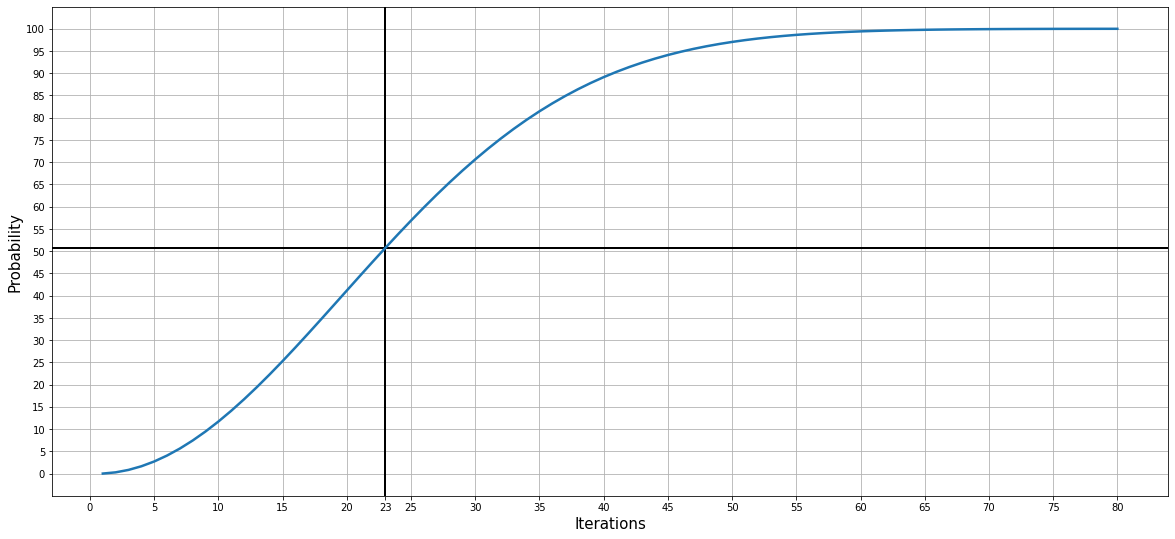

In [36]:
# Plotting graph
figure(figsize=(20,9))
x_axis = [group_size for group_size in range(0,81,5)]
x_axis.append(count)
plt.xticks(x_axis)
plt.axvline(count,linewidth=2,color="black")
plt.axhline(Y[count-1],linewidth=2,color="black")
plt.yticks([p for p in range(0,101,5)])
plt.plot(X[:80],Y[:80],linewidth = 2.5)
plt.xlabel("Iterations",fontsize = 15)
plt.ylabel("Probability",fontsize = 15)
plt.grid()
plt.savefig("formula.jpg")

# Do analysis from real life dataset

### I have used dataset of FIFA world cup. This dataset consists name of players who have same birthdays for each team participated in FIFA world cup. Mentioned players are also part of FIFA world cup.

Link of dataset:- https://pastebin.com/djNgEsrm

In [165]:
# This dict will have "year" as a key and value is another dictionary. 
# This sub dictionary has two keys:- "total" has a total number of 
# coincidents and "data" has yearWiseDict as a value

# I have used dictionary because it's data insert, delete and update time
# complexity is almost O(1).
dataDict = {} 

# This dictionary has key as country names and value as coincident
yearWiseDict = {} 
with open("data.txt") as file:
  
  for line in file.readlines():

    if('Number of countries with shared birthdays' in line):
      words = line.split()
      dataDict[words[-2][:-1]] = {} # because second last word is country name
      dataDict[words[-2][:-1]]["total"] = int(words[-1]) # last word is total
      dataDict[words[-2][:-1]]["data"] = yearWiseDict
      yearWiseDict = {}
    
    if('Coincidences' in line):
      words = line.split()
      yearWiseDict[words[-2][:-1]] = words[-1] # second last word is country 
                                               # name and last word is total

# Visulization

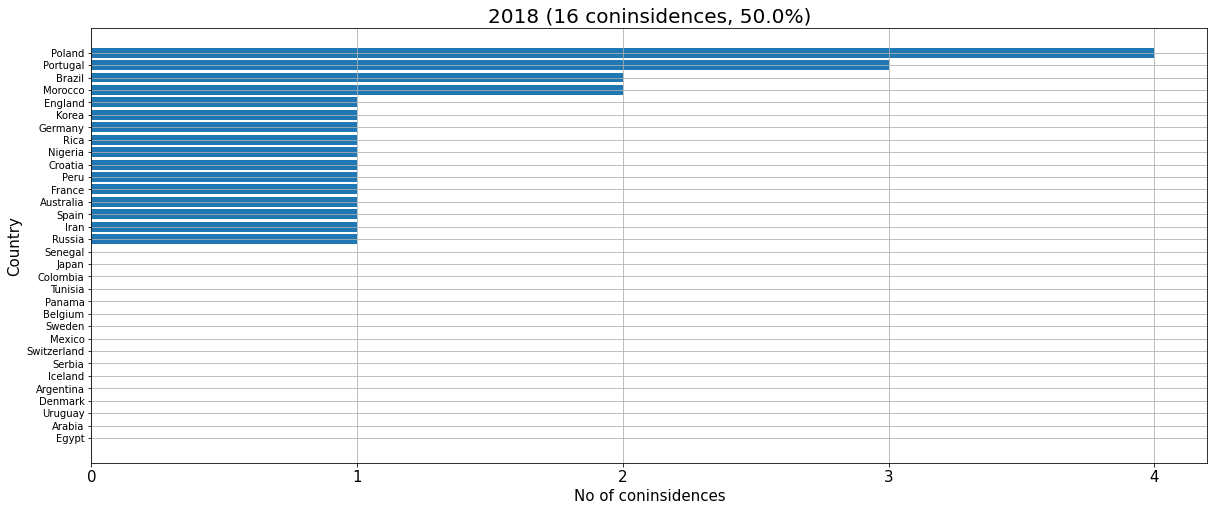

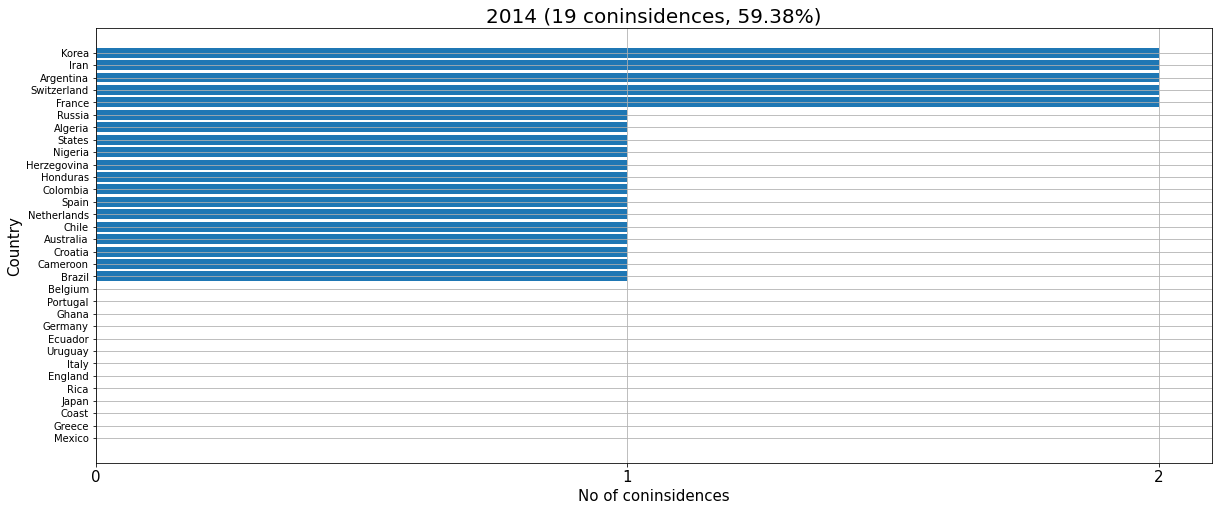

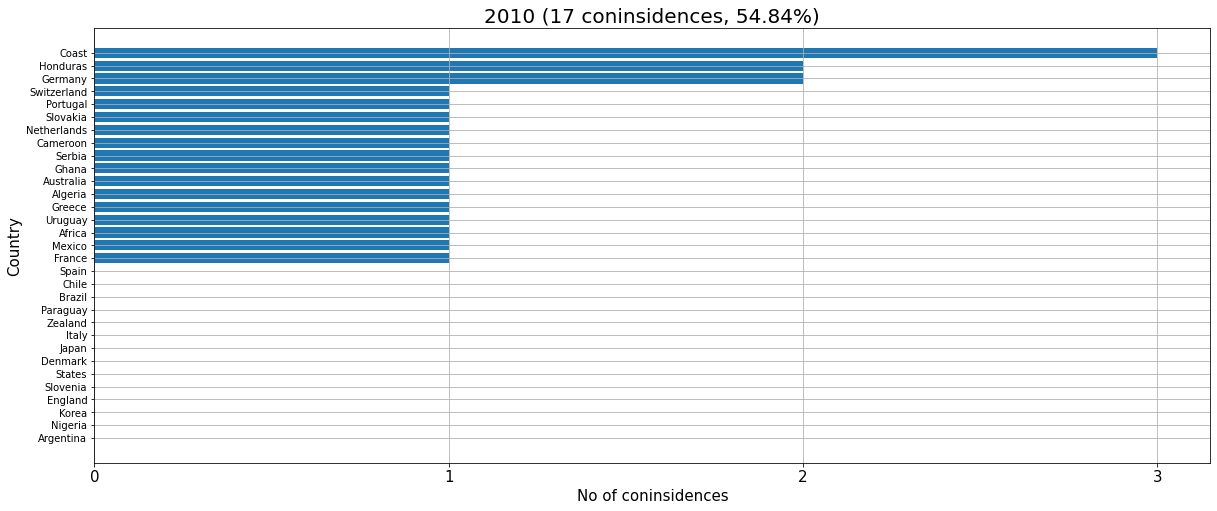

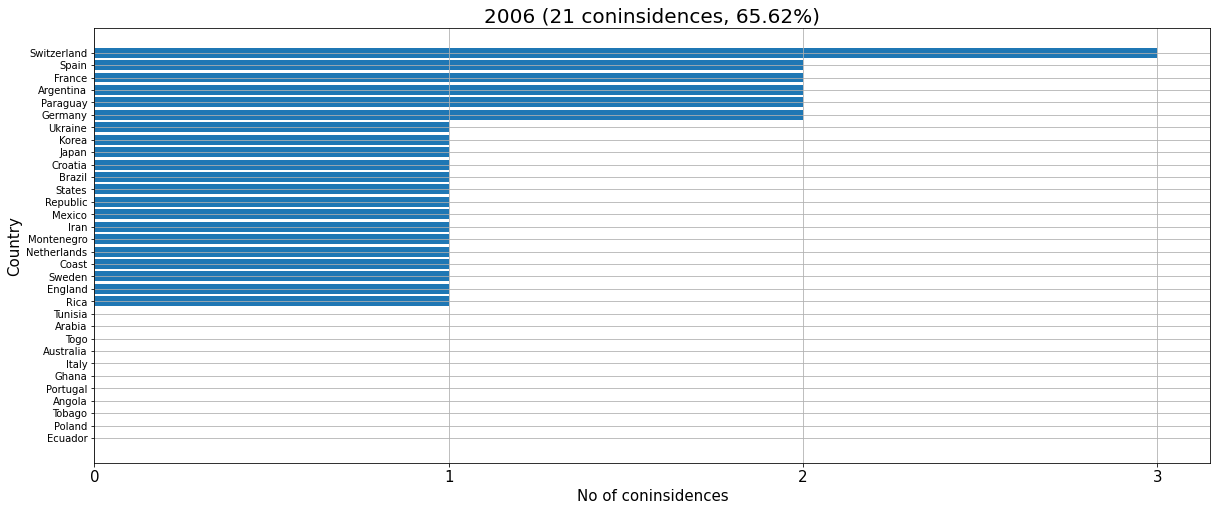

In [167]:
for year in dataDict:
  yearDict = dataDict[year]["data"]
  sortedData = sorted(yearDict.items(), key=lambda x: x[1])
  figure(figsize=(20,8))
  X = [x[1] for x in sortedData]
  Y = [x[0] for x in sortedData]
  plt.title("{} ({} coninsidences, {}%)".format(year,dataDict[year]["total"],
                          round((dataDict[year]["total"]/len(yearDict))*100,2)),
                          fontsize = 20)
  plt.xlabel("No of coninsidences",fontsize = 15)
  plt.ylabel("Country",fontsize = 15)
  plt.xticks(fontsize = 15)
  plt.barh(Y, X, align='center')
  plt.grid()
  plt.savefig(year + ".jpg")